# 청소년 정신건강 분석
- https://data.seoul.go.kr/dataList/10956/S/2/datasetView.do

In [119]:
import pandas as pd
file_path="./ref/청소년정신건강20250304.csv"
ori = pd.read_csv(file_path)
ori

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [120]:
# 컬럼명 지정
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험율','우울남학생','우울여학생','자살생각율','자살남학생','자살여학생']
ori.columns=new_name
ori

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [121]:
# 시점을 없애고, 0번 행도 없앰.
ori=ori.loc[1:,'시점':]
ori

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [126]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori.loc[1]=100-ori.loc[1:,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다
ori['응답'] = ['그렇다','아니다']
ori

ValueError: Incompatible indexer with DataFrame

In [125]:
# 응답 을 기준 인덱스가 정리
ori = ori.set_index('응답') # 컬럼 하나를 인덱스로 지정
ori

KeyError: "None of ['응답'] are in the columns"

In [ ]:
# OS에 사용가능한, 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

Text(0.3, 0.3, '한글')

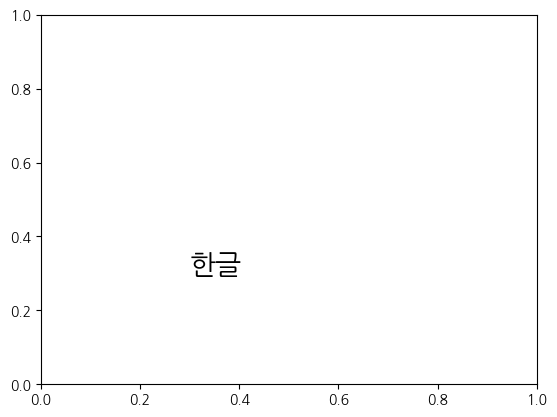

In [88]:
# 윈도우용 폰트  경로 설정
path= "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글', size=20)

<Axes: ylabel='스트레스'>

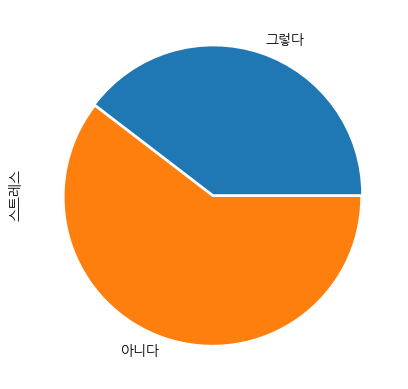

In [89]:
ori['스트레스'].astype(float).plot.pie(explode = [0,0.02])

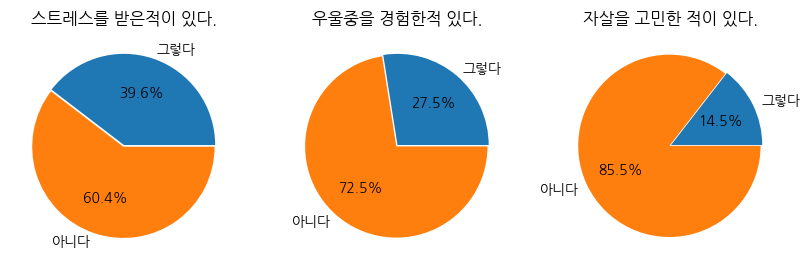

In [90]:
fig, ax = plt.subplots(1,3,figsize=(10,8))

ori['스트레스'].astype(float).plot.pie(explode = [0,0.02], ax =ax[0], autopct="%.1f%%")
ax[0].set_title('스트레스를 받은적이 있다.')
ax[0].set_ylabel('')

ori['우울감경험율'].astype(float).plot.pie(explode = [0,0.02], ax =ax[1], autopct="%.1f%%")
ax[1].set_title('우울중을 경험한적 있다.')
ax[1].set_ylabel('')

ori['자살생각율'].astype(float).plot.pie(explode = [0,0.02], ax =ax[2], autopct="%.1f%%")
ax[2].set_title('자살을 고민한 적이 있다.')
ax[2].set_ylabel('')

plt.show()